In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

html = browser.html
html_soup = soup(html, 'html.parser')

In [4]:
# Scrape the data in the HTML table
table = html_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [5]:
# Get all columns
headings = table.find_all("tr", class_=None)

columns = []

for th in headings[0].find_all("th"):
    columns.append(th.text.strip())
columns

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [6]:
# Get all data
data = table.find_all("tr", class_="data-row")
mars_temps = []

for tr in data:
    row = {}
    for td, th in zip(tr.find_all("td"), columns): 
        row[th] = td.text.strip()
        mars_temps.append(row)

browser.quit()   
mars_temps

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id'

In [7]:
# Assemble the scraped data into a Pandas DataFrame
mars_temps_df = pd.DataFrame(mars_temps)
mars_temps_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,2,2012-08-16,10,155,6,-75.0,739.0
2,2,2012-08-16,10,155,6,-75.0,739.0
3,2,2012-08-16,10,155,6,-75.0,739.0
4,2,2012-08-16,10,155,6,-75.0,739.0
...,...,...,...,...,...,...,...
13064,1895,2018-02-27,1977,135,5,-77.0,727.0
13065,1895,2018-02-27,1977,135,5,-77.0,727.0
13066,1895,2018-02-27,1977,135,5,-77.0,727.0
13067,1895,2018-02-27,1977,135,5,-77.0,727.0


In [8]:
# Examine the data types of all the DataFrame columns
mars_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13069 entries, 0 to 13068
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                13069 non-null  object
 1   terrestrial_date  13069 non-null  object
 2   sol               13069 non-null  object
 3   ls                13069 non-null  object
 4   month             13069 non-null  object
 5   min_temp          13069 non-null  object
 6   pressure          13069 non-null  object
dtypes: object(7)
memory usage: 714.8+ KB


In [9]:
# convert the data to the appropriate datetime, int, or float data types.
mars_temps_df["id"] = mars_temps_df["id"].astype(int)
mars_temps_df["sol"] = mars_temps_df["sol"].astype(int)
mars_temps_df["ls"] = mars_temps_df["ls"].astype(int)
mars_temps_df["month"] = mars_temps_df["month"].astype(int)
mars_temps_df["terrestrial_date"] = pd.to_datetime(mars_temps_df["terrestrial_date"])
mars_temps_df["min_temp"] = mars_temps_df["min_temp"].astype(float)
mars_temps_df["pressure"] = mars_temps_df["pressure"].astype(float)
mars_temps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13069 entries, 0 to 13068
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                13069 non-null  int32         
 1   terrestrial_date  13069 non-null  datetime64[ns]
 2   sol               13069 non-null  int32         
 3   ls                13069 non-null  int32         
 4   month             13069 non-null  int32         
 5   min_temp          13069 non-null  float64       
 6   pressure          13069 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 510.6 KB


In [10]:
# 6. Answer questions:How many months exist on Mars? 
print(f"There are {mars_temps_df['month'].max()} months exist on Mars")

There are 12 months exist on Mars


In [11]:
# 7. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
print(f"There are {mars_temps_df['sol'].sum()} Martian days worth of data exist in the scraped dataset")

There are 13273792 Martian days worth of data exist in the scraped dataset


In [15]:
# 8. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months.
avg_min_temps = mars_temps_df.groupby('month').agg(avg_temps=('min_temp', 'mean')).sort_values(by="avg_temps", ascending=True)
avg_min_temps                      

,avg_temps
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


<Figure size 1000x500 with 0 Axes>

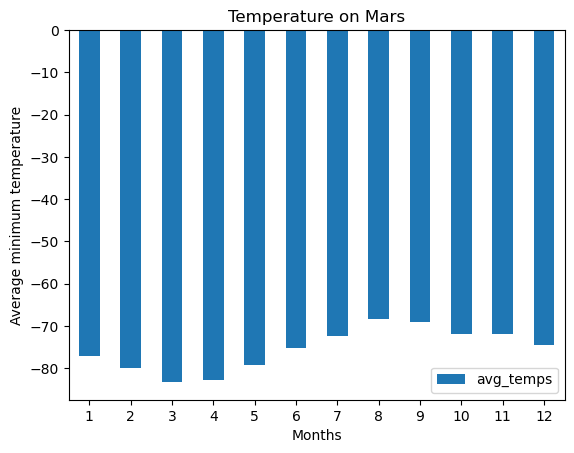

In [13]:
# Plot the results as a bar chart.

avg_min_temps = avg_min_temps.sort_values(by='month')

fig = plt.figure(figsize = (10, 5))
avg_min_temps.plot.bar(rot=0) 
 
plt.xlabel("Months")
plt.ylabel("Average minimum temperature")
plt.title("Temperature on Mars")
plt.show()


        March is the coldest month and August is the warmest month on Mars

In [16]:
# 9. Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months
avg_pressure = mars_temps_df.groupby('month').agg(avg_pressure=('pressure', 'mean')).sort_values(by="avg_pressure", ascending=True)
avg_pressure      

,avg_pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


<Figure size 1000x500 with 0 Axes>

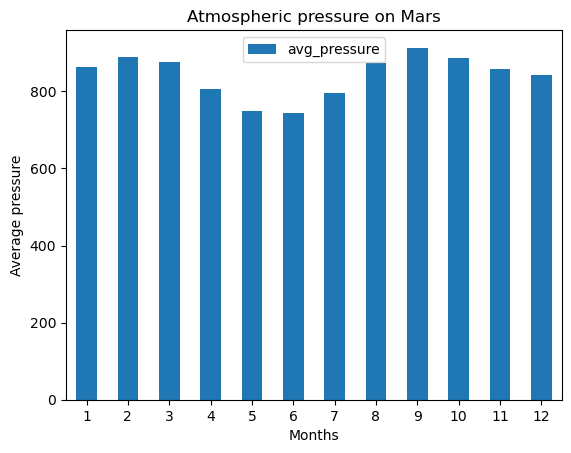

In [17]:
# Plot the results as a bar chart
avg_pressure = avg_pressure.sort_values(by='month')

fig = plt.figure(figsize = (10, 5))
avg_pressure.plot.bar(rot=0) 
 
plt.xlabel("Months")
plt.ylabel("Average pressure")
plt.title("Atmospheric pressure on Mars")
plt.show()

        June has the lowest atmospheric pressure on Mars and September has the highest atmospheric pressure on Mars

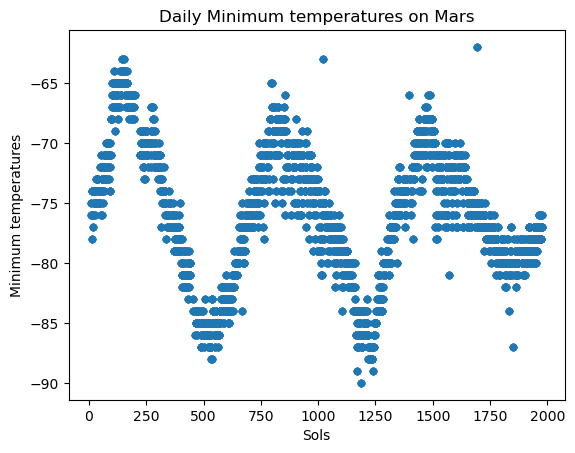

In [18]:
# 10. About how many terrestrial (Earth) days exist in a Martian year
mars_temps_df.plot.scatter(x='sol', y='min_temp')
plt.xlabel("Sols")
plt.ylabel("Minimum temperatures")
plt.title("Daily Minimum temperatures on Mars")
plt.show()

Based on the plot above, the 2 coldest temperatures at the bottom peaks indicate a cycle of a Martian year. The 1st coldest point is at about 550 sols and the other coldest point is at about 1200 sols. 
So, I think the estimated days would be (1200 - 510) = 690 days 

In [19]:
# Export the DataFrame to a CSV file
mars_temps_df.to_csv('Mars_Weather_Data.csv')